# Clustering Analysis of different algorithms on customer dataset 

## Aim
The aim is to compare different clustering algorithms on a customer dataset and determine the best algorithm for the dataset.

## Introduction

Clustering is a type of unsupervised learning method. It is used to group data points having similar characteristics. Clustering is used in many fields such as market research, pattern recognition, image processing, data analysis, and many more. Clustering is used to find the hidden patterns and group the data into clusters. The data points in the same cluster are similar to each other and the data points in different clusters are dissimilar to each other. 

## Data Understanding
The dataset contains 3 features and 2000 rows of data. The features are :

| <th>Feature</th> | <th>Description</th> |
| <td>ID</td> | <td>The ID of the customer</td> |
| <td>Sex</td> | <td>The Gender of the customer</td> |
| <td>Marital status</td> | <td>The Marital status of the customer</td> |
| <td>Age</td> | <td>The Age of the customer</td> |
| <td>Education</td> | <td>The Education of the customer</td> |
| <td>Occupation</td> | <td>The Occupation of the customer</td> |
| <td>Income</td> | <td>The Income of the customer</td> |
| <td>Settlement size</td> | <td>The Settlement size of the customer</td> |
| --- | --- |


## Data Preparation
The data has to be prepared for the analysis. The data preparation is done in 2 steps.
- Data cleaning: The data contains missing values and duplicates. The missing values are replaced with the mean of the column and the duplicates are removed.
- Data transformation: The dataset contains no categorical features. The data is transformed by using the StandardScaler and normalize methods.
- Data scaling: The data contains features with different scales. The data is scaled to bring all the features to the same scale.

## Modeling

The data is clustered by using the K-Means, Agglomerative Hierarchy, Spectral and Mean-Shift algorithms. The clustering analysis is done by using the Elbow method, Dendrogram, PCA and metrics.

## Evaluation

The Clustering algorithm are evaluated using the following metrics:
1. Silhouette Score
2. Calinski Harabasz Score
3. Davies Bouldin Score

<hr>

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read the file
df = pd.read_csv('segmentation data.csv')
df.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
# Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
# Check the descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Sex,2000.0,4.570000e-01,0.498272,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Marital status,2000.0,4.965000e-01,0.500113,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Education,2000.0,1.038000e+00,0.599780,0.0,1.000000e+00,1.0,1.000000e+00,3.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0
Occupation,2000.0,8.105000e-01,0.638587,0.0,0.000000e+00,1.0,1.000000e+00,2.0
Settlement size,2000.0,7.390000e-01,0.812533,0.0,0.000000e+00,1.0,1.000000e+00,2.0


In [5]:
print(df.isnull().sum(),'\n')
print('Duplicated',df.duplicated().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64 

Duplicated 0


# Data Visualization 

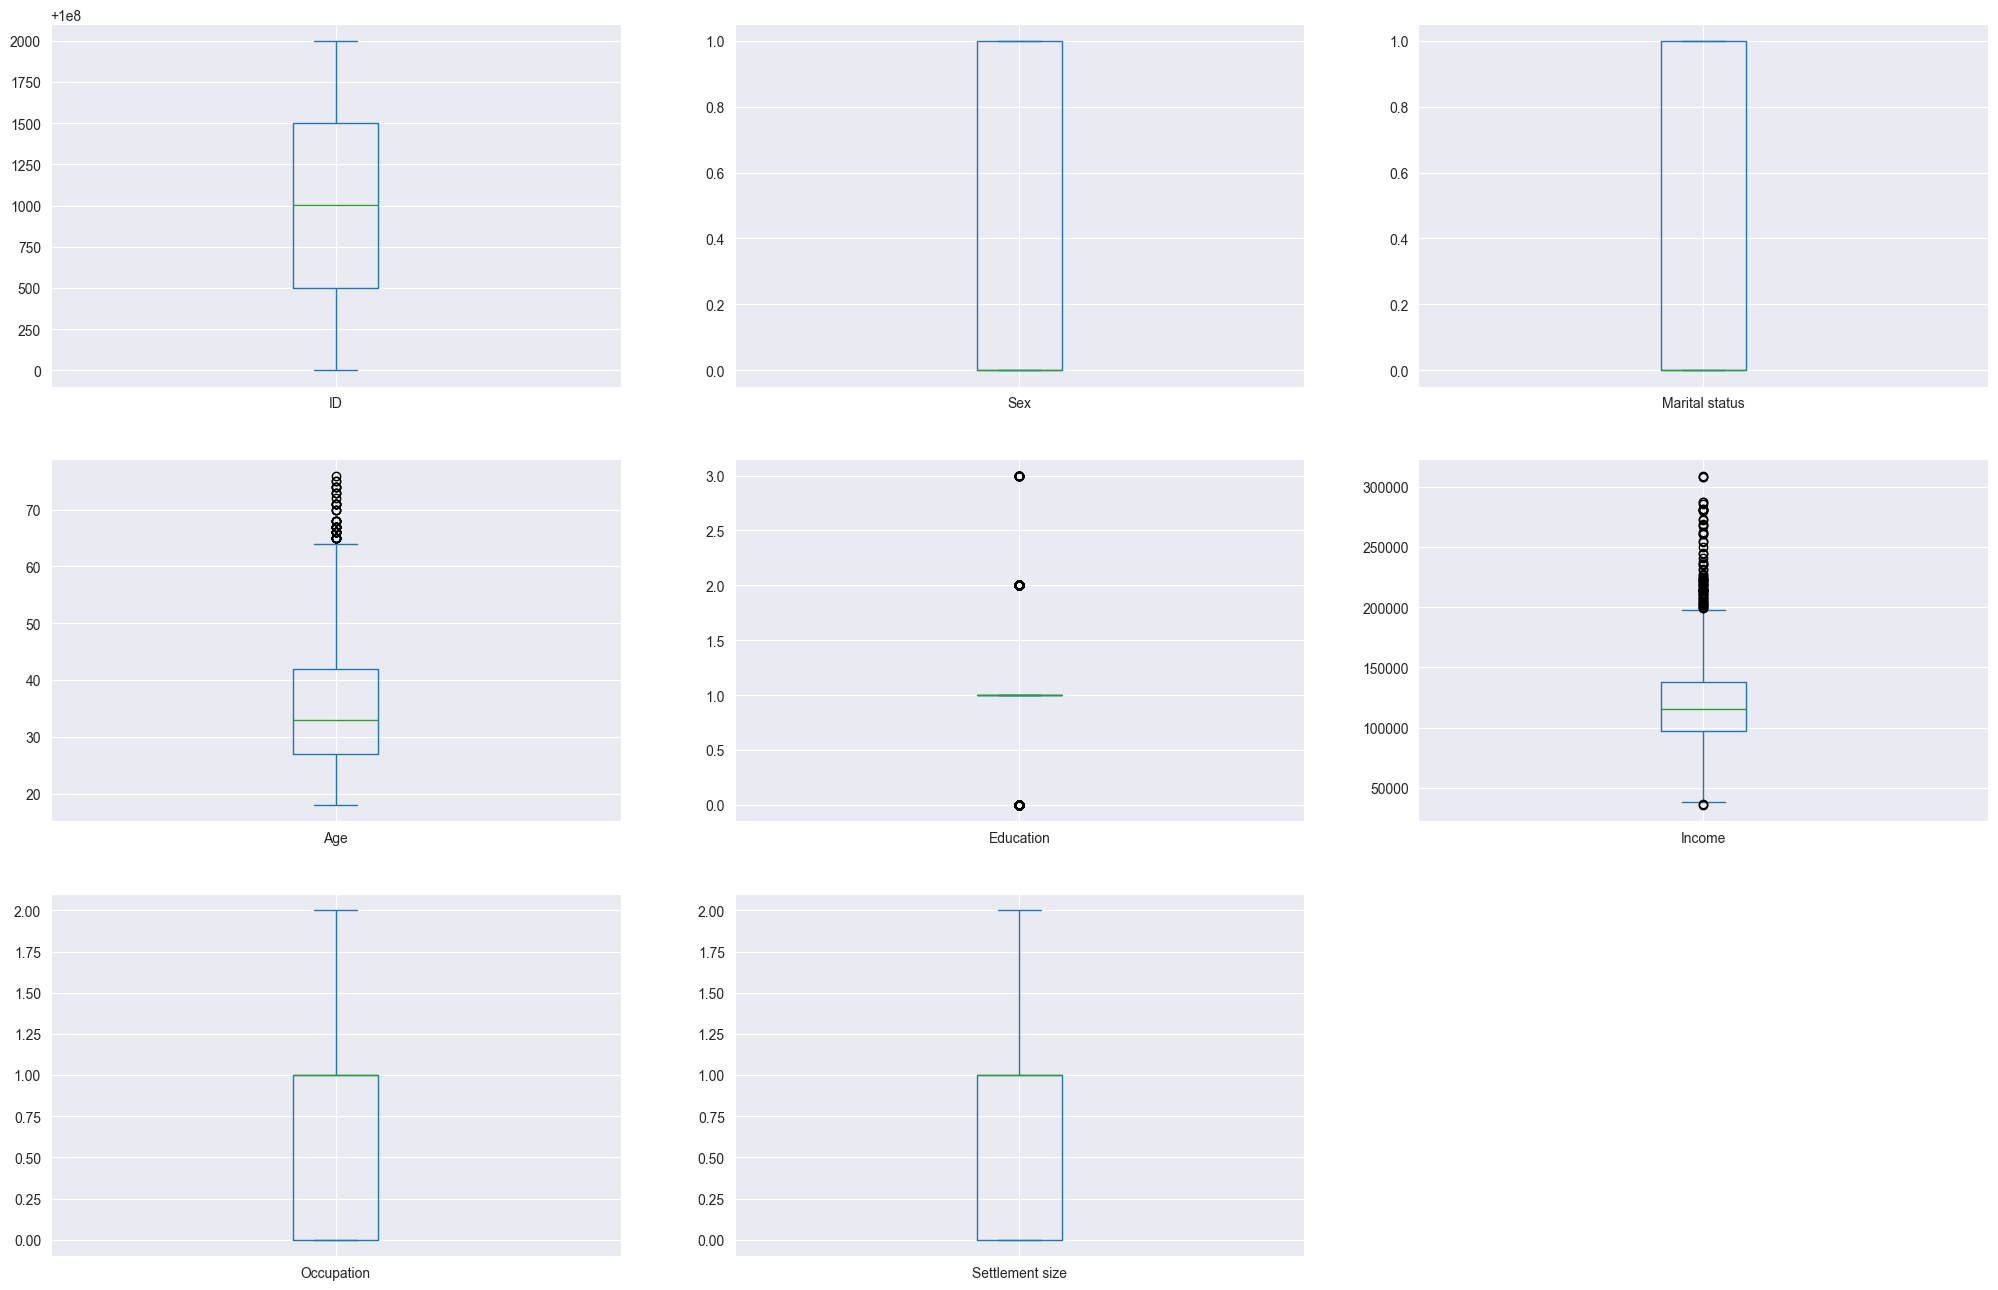

In [6]:
# Check the outliers of the data
df.plot(kind='box',subplots=True,figsize=(25,16),layout=(3,3))
plt.show()

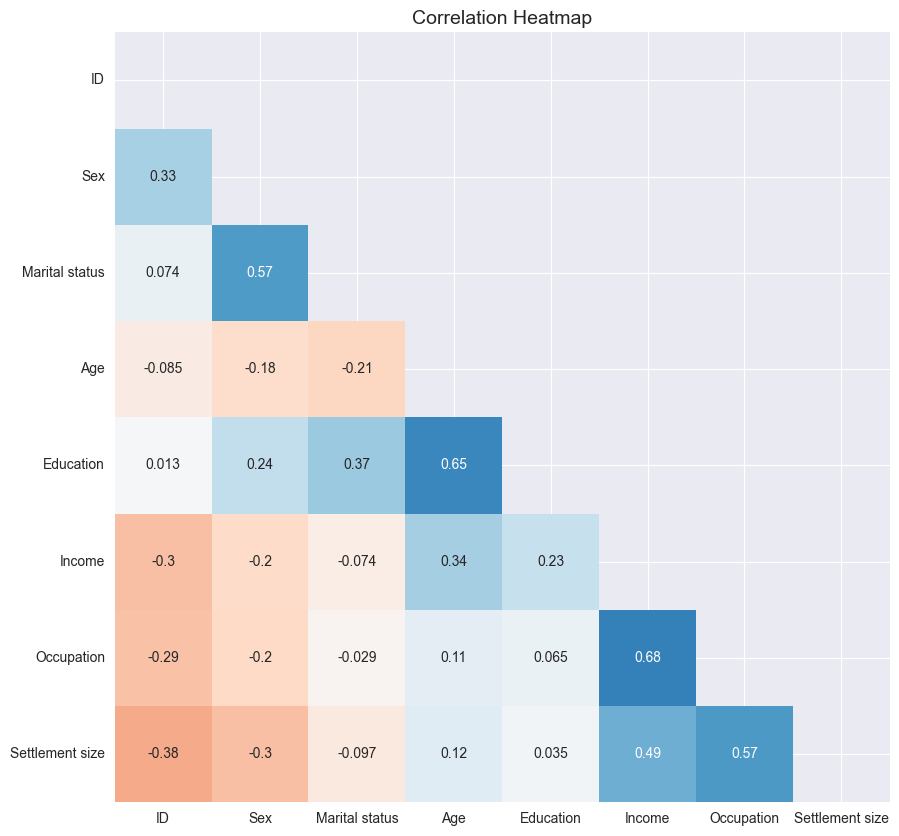

In [7]:
# Check the correlation of the data in heatmap
plt.figure(figsize=(10,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 
sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=mask,annot=True, cmap='RdBu',fmt='.2g',cbar=False)
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

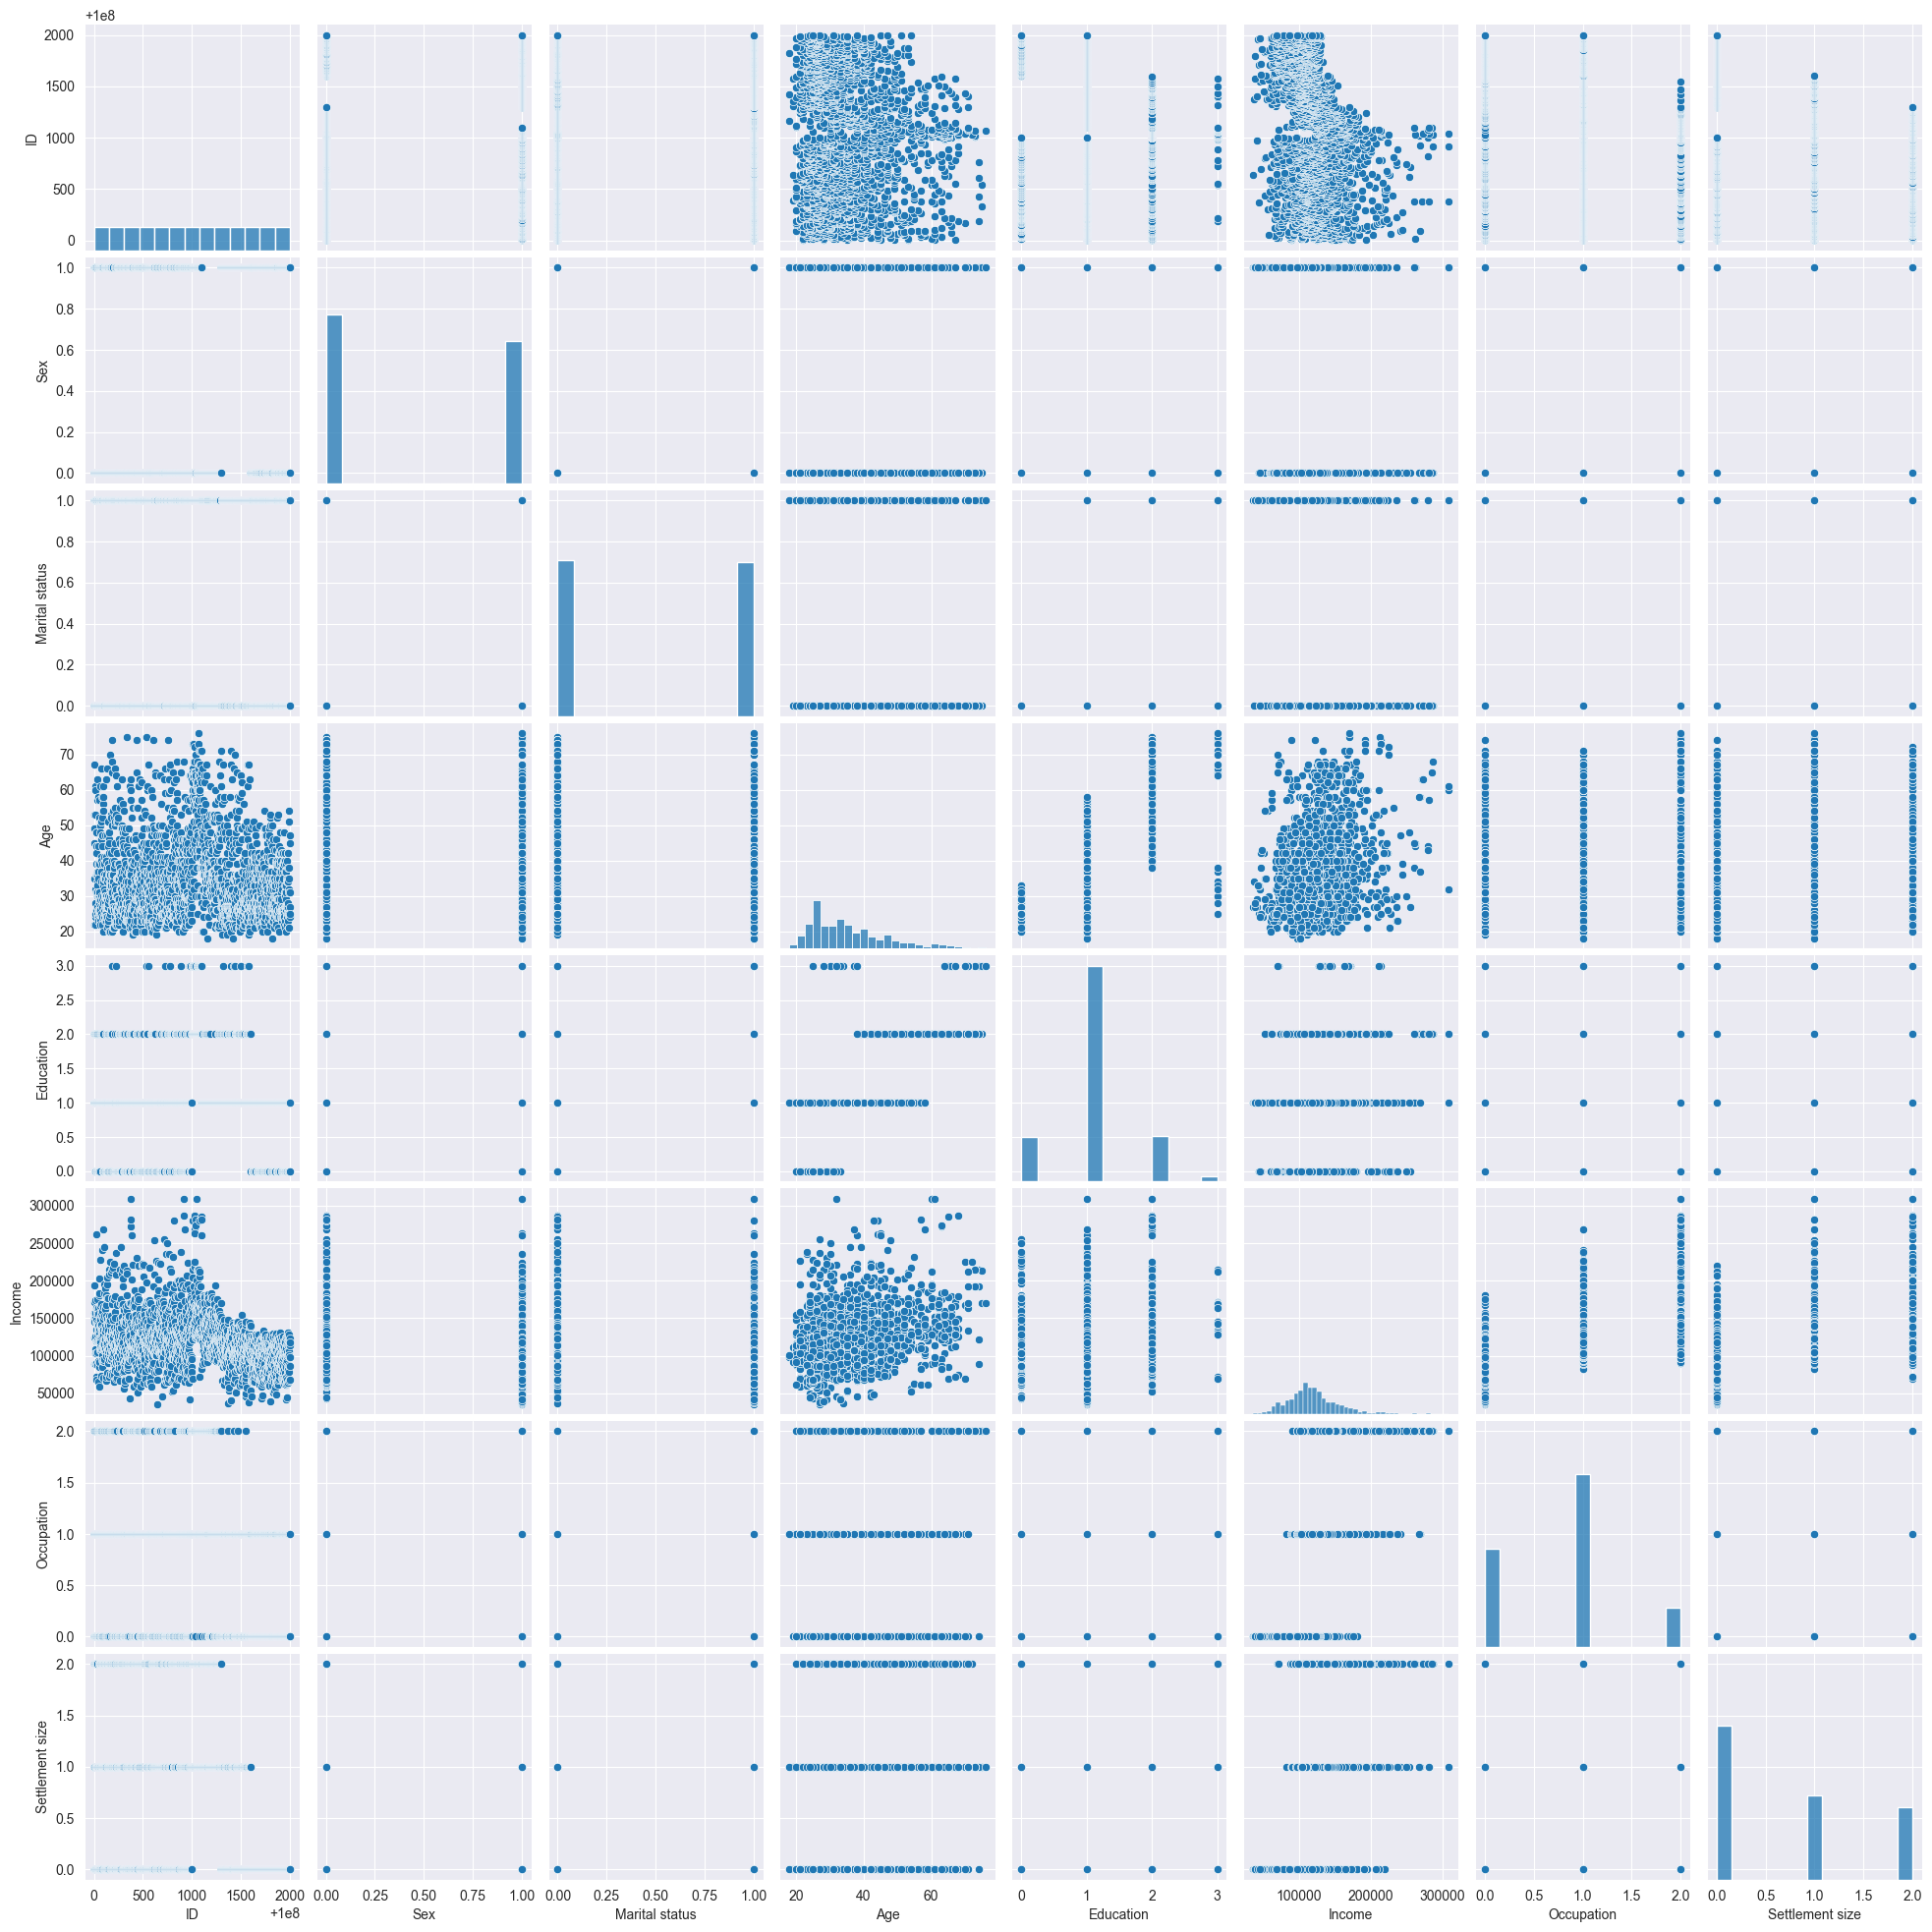

In [8]:
# Check the distribution of the data
sns.pairplot(df)
plt.show()

## Data Cleaning 

In [9]:
# Drop the unnecessary columns & select the features
data = df.drop(columns=['ID','Sex','Marital status','Occupation','Settlement size'])

In [10]:
data.head(5)

,Age,Education,Income
0,67,2,124670
1,22,1,150773
2,49,1,89210
3,45,1,171565
4,53,1,149031


## Scaling & Normalization

In [11]:
sc = StandardScaler()

df_sc = sc.fit_transform(data)
df_sc_norm = normalize(df_sc)
df_sc_norm = pd.DataFrame(df_sc_norm, columns=data.columns)

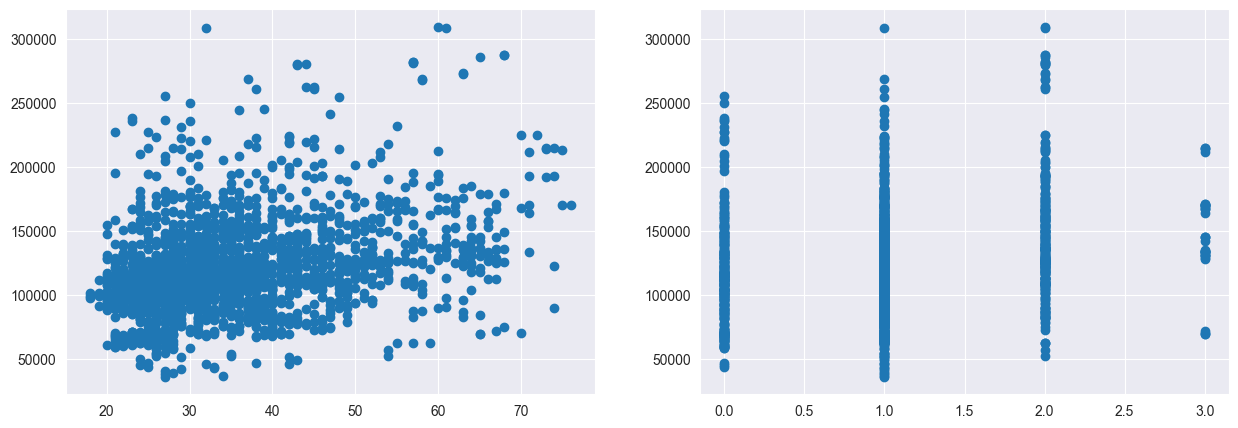

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(data['Age'], data['Income'])

plt.subplot(1,2,2)
plt.scatter(data['Education'], data['Income'])
plt.show()

## Clustering Model & Analysis

### K-Means Clustering

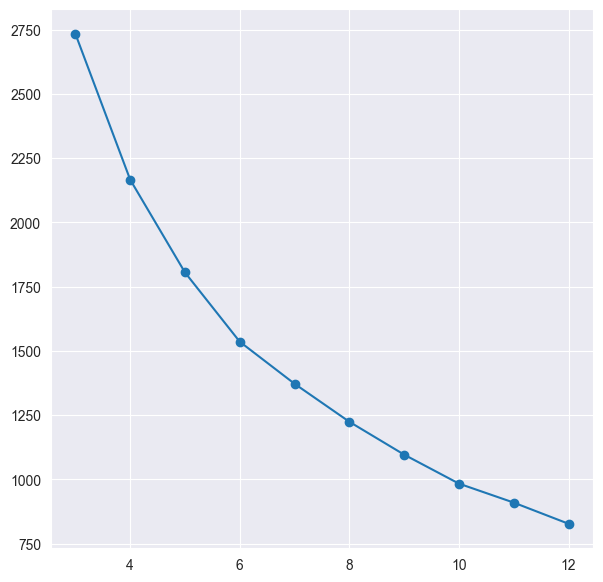

In [13]:
# Elbow method
clusters_range=[3,4,5,6,7,8,9,10,11,12]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=42).fit(df_sc)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')
plt.show()

In [14]:
# K-Means Model & labels
k_model_ = KMeans(n_clusters=6)
k_model_.fit(data)

labels_k = k_model_.labels_
lables_k_pred = k_model_.predict(data)

df_k = pd.DataFrame(dict(Age=data['Age'], Income=data['Income'],Education=data['Education'], label=labels_k))

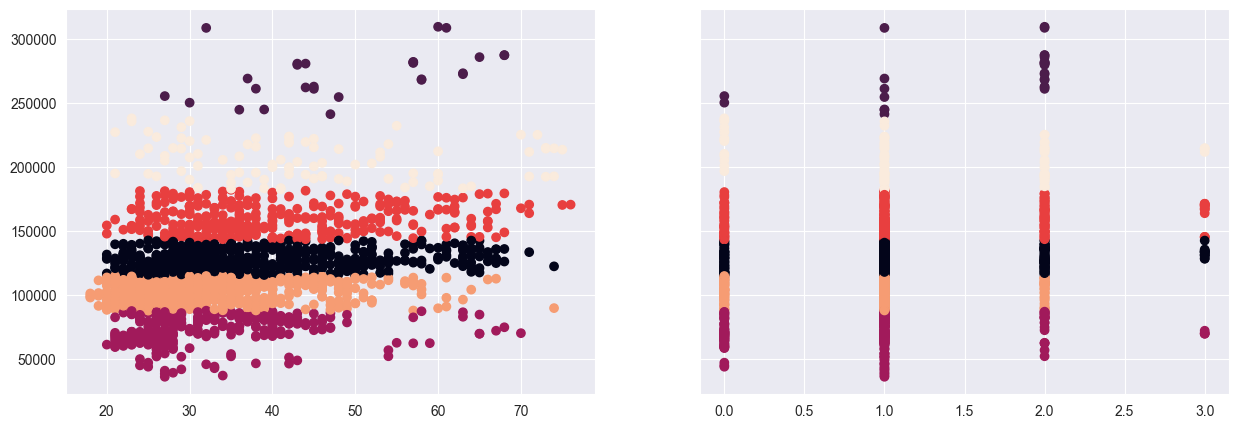

In [15]:
# Visualize the clusters
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
ax1.scatter(df_k['Age'], df_k['Income'], c=df_k['label'])
ax2.scatter(df_k['Education'], df_k['Income'], c=df_k['label'])
plt.show()


In [16]:
# Metrics 
sil_scores = []
calinski_score = []
davies_score = []

sil_scores.append(silhouette_score(df_k, labels_k))
calinski_score.append(calinski_harabasz_score(df_k, labels_k))
davies_score.append(davies_bouldin_score(df_k, labels_k))

In [17]:
# Print the metrics
print(sil_scores)
print(calinski_score)
print(davies_score)

[0.5424082773891914]
[6154.097985973389]
[0.4926268099284719]


### Agglomerative Hierarchy Clustering

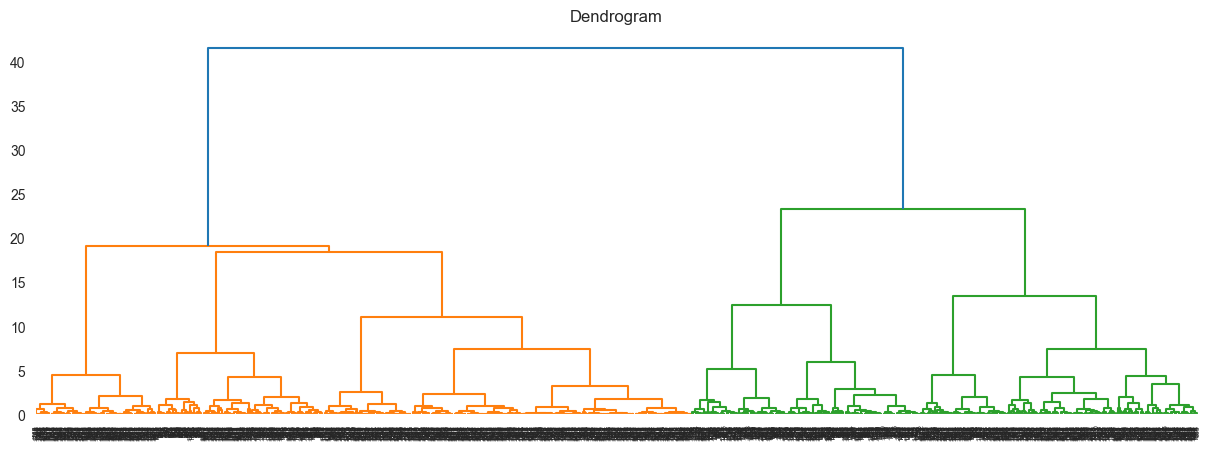

In [18]:
# Dendrogram
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
shc.dendrogram(shc.linkage(df_sc_norm, method='ward'))
plt.show()

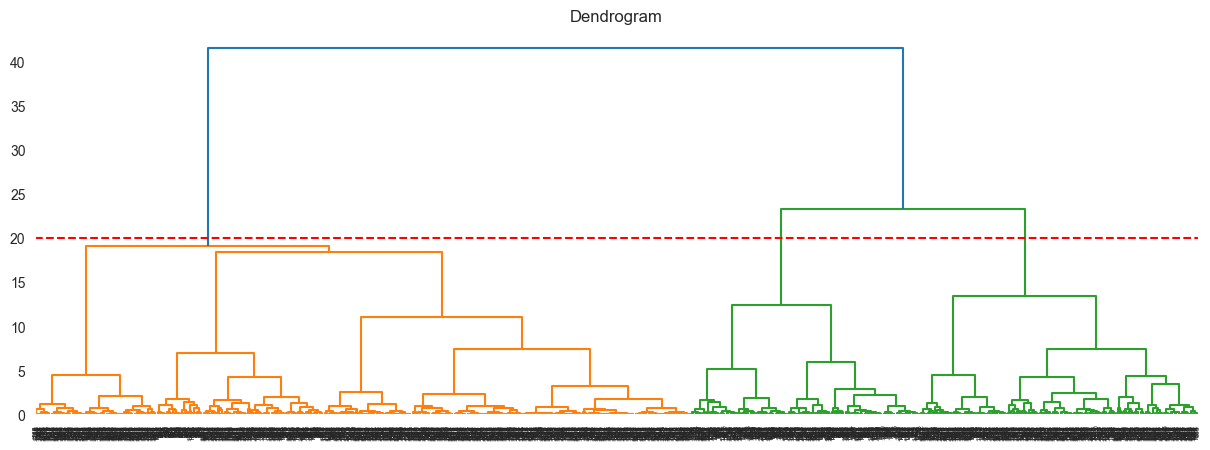

In [19]:
# Dendrogram with threshold
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
shc.dendrogram(shc.linkage(df_sc_norm, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')
plt.show()

In [20]:
# Agglomerative Model & labels
aggh_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
aggh_model.fit(data)

labels_aggh = aggh_model.labels_
labels_aggh_pred = aggh_model.fit_predict(data)

df_aggh = pd.DataFrame(dict(Age=data['Age'], Income=data['Income'],Education=data['Education'], label=labels_aggh))

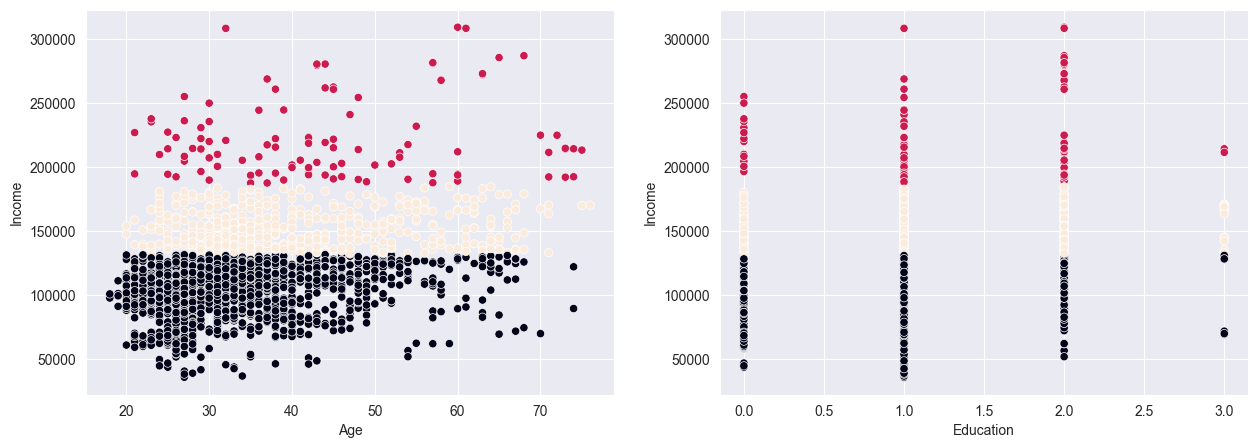

In [21]:
# Visualize the clusters
plt.figure(figsize=(15, 5))

# First Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_aggh['Age'], y=df_aggh['Income'], c=labels_aggh)

plt.subplot(1,2,2)
sns.scatterplot(x=df_aggh['Education'], y=df_aggh['Income'], c=labels_aggh)

plt.show()

In [22]:
# Metrics
sil_scores.append(silhouette_score(data, labels_aggh_pred))
calinski_score.append(calinski_harabasz_score(data, labels_aggh_pred))
davies_score.append(davies_bouldin_score(data, labels_aggh_pred))

In [23]:
# Print the metrics
print(sil_scores[-1])
print(calinski_score[-1])
print(davies_score[-1])

0.5285291450559162
2795.3150283177406
0.5501356338545678


### Spectral Clustering

In [24]:
# PCA
pca = PCA(n_components = 3)
X_principal = pca.fit_transform(data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2','P3']

In [25]:
# Spectral Model & labels
spm = SpectralClustering(n_clusters = 5, assign_labels='discretize', affinity ='nearest_neighbors',random_state=42)
spm.fit(X_principal)

labels_spm = spm.fit(X_principal).labels_
labels_spm_pred = spm.fit_predict(X_principal)

df_spm = pd.DataFrame(dict(Age=data['Age'], Income=data['Income'], Education=data['Education'], label=labels_spm))

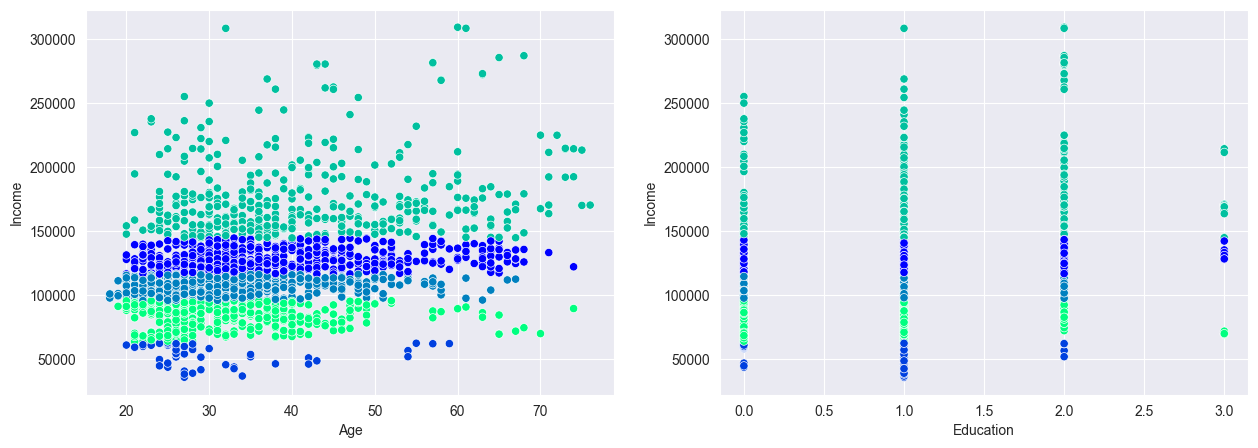

In [26]:
# Visualize the clusters
plt.figure(figsize=(15, 5))

# First Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_spm['Age'], y=df_spm['Income'], c=labels_spm,cmap =plt.cm.winter)

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_spm['Education'], y=df_spm['Income'], c=labels_spm,cmap =plt.cm.winter)

plt.show()

In [27]:
# Metrics
sil_scores.append(silhouette_score(df_spm, labels_spm_pred))
calinski_score.append(calinski_harabasz_score(df_spm, labels_spm_pred))
davies_score.append(davies_bouldin_score(df_spm, labels_spm_pred))

In [28]:
# Print the metrics
print(sil_scores[-1])
print(calinski_score[-1])
print(davies_score[-1])

0.44977569987757393
2080.753163277984
0.5853517639853769


### Mean-Shift Clustering

In [29]:
# Mean-Shift Model, estimate bandwidth & labels 
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=200)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(data)

labels_ms = ms.labels_
labels_ms_pred = ms.predict(data)

df_ms = pd.DataFrame(dict(Age=data['Age'], Income=data['Income'], Education=data['Education'], label=labels_ms))

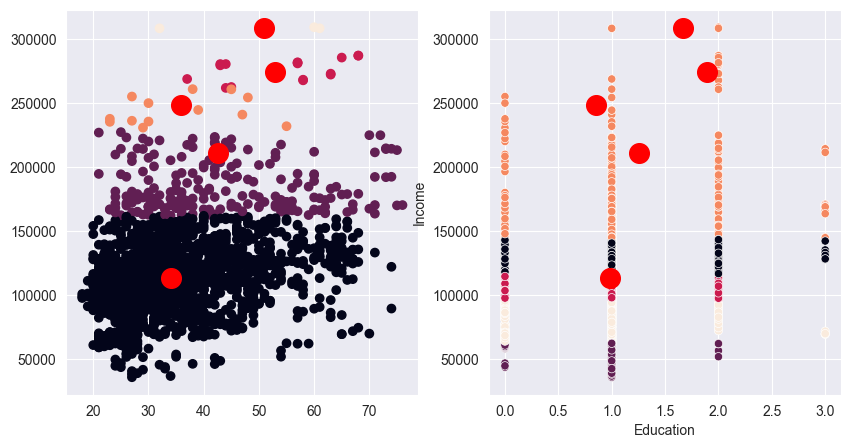

In [30]:
# Extracting the cluster labels and cluster centers
centers = ms.cluster_centers_

# Visualizing the clusters
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(df_ms['Age'], df_ms['Income'], c=labels_ms)
plt.scatter(centers[:,0], centers[:, 2], marker='o', color='red', s=200)

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_spm['Education'], y=df_spm['Income'], c=labels_spm)
plt.scatter(centers[:,1], centers[:, 2], marker='o', color='red', s=200)


plt.show()

In [31]:
# Metrics
sil_scores.append(silhouette_score(df_ms, labels_ms))
calinski_score.append(calinski_harabasz_score(df_ms, labels_ms))
davies_score.append(davies_bouldin_score(df_ms, labels_ms))

In [32]:
# Print the metrics
print(sil_scores[-1])
print(calinski_score[-1])
print(davies_score[-1])


0.5480491883187526
717.1685086616901
0.4437871047046447


### Comparison of the clustering algorithms

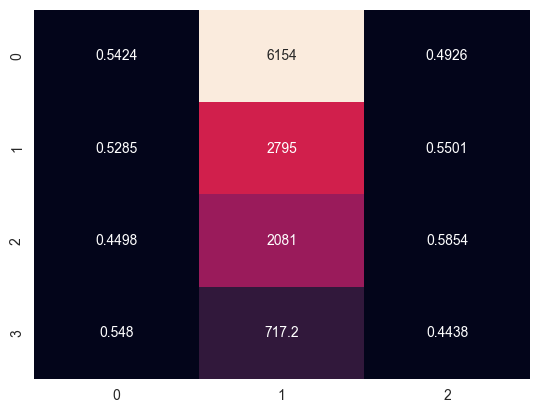

In [33]:
# Create an array of the metrics
results = np.column_stack((sil_scores,calinski_score,davies_score))
results = pd.DataFrame(results)
# Show the results in heatmap
sns.heatmap(results, annot=True,fmt='.4g',cbar=False, robust=True)
plt.show()

<hr>

## Results

The results of the metrics are shown in the heatmap. The best clustering algorithm is K-Means with 6 clusters because it has the highest silhouette score and the lowest davies bouldin score. The worst clustering algorithm is Mean-Shift with 3 clusters because it has the lowest silhouette score and the highest davies bouldin score.

## Conclusion

The best clustering algorithm is K-Means with 6 clusters.